Test with a mnist dataset for the models. 

Import the models and the detaset

In [1]:
import Model
import tensorflow as tf
from tensorflow import keras
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(tf.__version__)
print(tf.keras.__version__)

Using TensorFlow backend.



Attention Model



W0611 11:19:54.050281 140370406795008 deprecation.py:506] From /home/werer/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:4081: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
permute (Permute)               (None, 28, 28, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 10)   60          permute[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v2 (BatchNo (None, 28, 28, 10)   40          conv2d[0][0]                     
______________________________________________________________________________________________

See the dataset information

(60000, 28, 28)


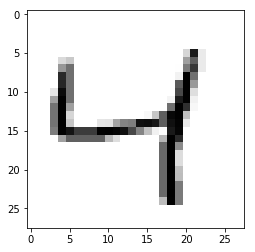

(60000,)
4
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [2]:
%matplotlib inline 
from matplotlib import pyplot as plt

print(x_train.shape)

plt.imshow(x_train[2], cmap='Greys')
plt.show()

print(y_train.shape)

print(y_train[2])

#Reshepe the vector for the network

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

Create the attention model

In [3]:
attentionModel = Model.AttentionModel(10, x_train.shape[1], x_train.shape[2])
attentionModel.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
permute_3 (Permute)             (None, 28, 28, 1)    0           input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 28, 28, 10)   60          permute_3[0][0]                  
__________________________________________________________________________________________________
batch_normalization_v2_8 (Batch (None, 28, 28, 10)   40          conv2d_6[0][0]                   
____________________________________________________________________________________________

Fit the attention model.

In [4]:

attentionModel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

import math
#results = attentionModel.fit(x = x_train, y = y_train, batch_size = 32, epochs = 1, use_multiprocessing = True, workers = 4)

Now test the network

In [5]:
attentionModel.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 372us/sample - loss: 2.3042 - sparse_categorical_accuracy: 0.0737


[2.3042303298950197, 0.0737]

Now try to predict

In [53]:
pred = attentionModel.predict(x_test[55].reshape(1, 28, 28, 1))
print(pred.argmax())
print(y_test[55])

3
0


Now try to train the LSTM Autoencoder 

In [7]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

LSTM_Ae = Model.LSTMAutoencoder(10, x_train.shape[1], x_train.shape[2])
LSTM_Ae.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
bidirectional_12 (Bidirectional [(None, 28), (None,  4816        input_9[0][0]                    
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 16)           240         bidirectional_12[0][1]           
__________________________________________________________________________________________________
dense_33 (Dense)                (None, 16)           240         bidirectional_12[0][2]           
____________________________________________________________________________________________

We need to create a replica of the input for the decoder input

In [8]:
import numpy as np
print(x_train[25])
print(x_train.shape)
x_train_2 = np.delete(x_train,0,2)
print(x_train_2.shape)
print(x_train_2[25])
x_train_3 = np.insert(x_train_2, 0, values=0, axis=2)
print(x_train_3.shape)
print(x_train[25])
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
zero = np.zeros((60000, 1, 28))
# Run training
LSTM_Ae.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
LSTM_Ae.fit([x_train_noisy, x_train_3], x_train,
          batch_size=32,
          epochs=10)

Epoch 1/10
 3072/60000 [>.............................] - ETA: 44s - loss: 0.0664 - accuracy: 0.1136

KeyboardInterrupt: 

Try to save the weights of the model

In [10]:
# Save weights of the model
#LSTM_Ae.save_weights('prova.h5')
LSTM_Ae.load_weights('prova.h5')

ValueError: Shapes (28, 56) and (28, 256) are incompatible

Now I need to transfer the weight of the autoencoder to the encoder only and create a FCNN to predict

In [11]:
LSTM_Encoder = Model.LSTMAutoencoder_Encoder(10, x_train.shape[1], x_train.shape[2])
LSTM_Encoder.summary()

#print(LSTM_Ae.layers[3])

weights = LSTM_Ae.layers[1].get_weights()
LSTM_Encoder.layers[1].set_weights(weights)
weights = LSTM_Ae.layers[2].get_weights()
LSTM_Encoder.layers[2].set_weights(weights)
weights = LSTM_Ae.layers[3].get_weights()
LSTM_Encoder.layers[3].set_weights(weights)
weights = LSTM_Ae.layers[4].get_weights()
LSTM_Encoder.layers[4].set_weights(weights)
weights = LSTM_Ae.layers[5].get_weights()
LSTM_Encoder.layers[5].set_weights(weights)

#print(weights)

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
bidirectional_14 (Bidirectional [(None, 28), (None,  4816        input_11[0][0]                   
__________________________________________________________________________________________________
dense_41 (Dense)                (None, 16)           240         bidirectional_14[0][1]           
__________________________________________________________________________________________________
dense_42 (Dense)                (None, 16)           240         bidirectional_14[0][2]           
____________________________________________________________________________________________

Create the classifier

In [12]:
from tensorflow.keras import layers, models

classifier = models.Sequential()
classifier.add(layers.Dense(64, activation='relu', input_shape=(64, )))
classifier.add(layers.Dense(32, activation='relu'))
classifier.add(layers.Dense(10, activation='softmax'))

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_46 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_47 (Dense)             (None, 10)                330       
Total params: 6,570
Trainable params: 6,570
Non-trainable params: 0
_________________________________________________________________


Now try a encode an image with the encoder

In [13]:
encoding = LSTM_Encoder.predict(x_train)

print(encoding.shape)
print(y_train.shape)
print(encoding[504])

(60000, 64)
(60000,)
[0.         0.26785648 0.16101842 0.1532299  0.29312775 0.
 0.         0.04602627 0.01641299 0.12781507 0.2819981  0.
 0.14306137 0.         0.31564468 0.2505328  0.         0.
 0.         0.         0.         0.47948408 0.         0.
 0.         0.09474991 0.         0.         0.17250241 0.34513155
 0.         0.06601405 0.         0.         0.31876144 0.
 0.3198355  0.47635958 0.         0.         0.         0.08480777
 0.25288394 0.         0.3700547  0.         0.         0.00576917
 0.         1.0783584  0.         0.2588795  0.         0.
 0.         0.02866453 1.0692784  0.         0.21690324 0.08401376
 0.         0.         0.3002395  0.47288176]


Now we can train the classifier with the encode word

In [14]:
classifier.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

classifier.fit(x = encoding, y = y_train, batch_size = 32, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 2s 29us/sample - loss: 1.3754 - accuracy: 0.5156
Epoch 2/5
60000/60000 [==============================] - 2s 31us/sample - loss: 1.0737 - accuracy: 0.6201
Epoch 3/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.9783 - accuracy: 0.6581
Epoch 4/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.9079 - accuracy: 0.6822
Epoch 5/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.8533 - accuracy: 0.7019


In [15]:
code = LSTM_Encoder.predict(x_test)
pred = classifier.evaluate(code, y_test)
print(pred)
print(y_test[40])

10000/10000 [==============================] - 0s 18us/sample - loss: 0.8293 - accuracy: 0.7129
[0.8293180106163025, 0.7129]
1


Now a test on the CNN - RNN Autoencoder in the same manner of the previous autoencoder

In [16]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

S2S = Model.Seq2SeqModel(10, x_train.shape[1], x_train.shape[2])
S2S.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
permute_4 (Permute)             (None, 28, 28, 1)    0           input_12[0][0]                   
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 28, 28, 10)   60          permute_4[0][0]                  
__________________________________________________________________________________________________
batch_normalization_v2_10 (Batc (None, 28, 28, 10)   40          conv2d_8[0][0]                   
____________________________________________________________________________________________

In [17]:
print(x_train[25])
print(x_train.shape)
x_train_2 = np.delete(x_train,0,2)
print(x_train_2.shape)
print(x_train_2[25])
x_train_3 = np.insert(x_train_2, 0, values=0, axis=2)
print(x_train_3.shape)
print(x_train[25])
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [40]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train_noisy = x_train_noisy.reshape(x_train.shape[0], 28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train_noisy = x_train_noisy.astype('float32')
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

S2S.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
S2S.fit([x_train_noisy, x_train_3], x_train,
          batch_size=32,
          epochs=5)

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
Epoch 1/5
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.0949 - accuracy: 0.8088
Epoch 2/5
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.0949 - accuracy: 0.8088
Epoch 3/5
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.0949 - accuracy: 0.8088
Epoch 4/5
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.0949 - accuracy: 0.8088
Epoch 5/5
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.0949 - accuracy: 0.8088


In [41]:
# Save weights of the model
S2S.save_weights('provaS2S.h5')
#S2S.load_weights('provaS2S.h5')

In [42]:
S2S_Encoder = Model.Seq2SeqModel_Encoder(10, x_train.shape[1], x_train.shape[2])
S2S_Encoder.summary()

weights = S2S.layers[2].get_weights()
S2S_Encoder.layers[2].set_weights(weights)
weights = S2S.layers[3].get_weights()
S2S_Encoder.layers[3].set_weights(weights)
weights = S2S.layers[4].get_weights()
S2S_Encoder.layers[4].set_weights(weights)
weights = S2S.layers[5].get_weights()
S2S_Encoder.layers[5].set_weights(weights)
weights = S2S.layers[7].get_weights()
S2S_Encoder.layers[7].set_weights(weights)
weights = S2S.layers[8].get_weights()
S2S_Encoder.layers[8].set_weights(weights)
weights = S2S.layers[9].get_weights()
S2S_Encoder.layers[9].set_weights(weights)
weights = S2S.layers[10].get_weights()
S2S_Encoder.layers[10].set_weights(weights)
weights = S2S.layers[11].get_weights()
S2S_Encoder.layers[11].set_weights(weights)
weights = S2S.layers[12].get_weights()
S2S_Encoder.layers[12].set_weights(weights)

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
permute_8 (Permute)             (None, 28, 28, 1)    0           input_17[0][0]                   
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 28, 28, 10)   60          permute_8[0][0]                  
__________________________________________________________________________________________________
batch_normalization_v2_20 (Batc (None, 28, 28, 10)   40          conv2d_16[0][0]                  
___________________________________________________________________________________________

In [43]:
classifier2 = models.Sequential()
classifier2.add(layers.Dense(64, activation='relu', input_shape=(64, )))
classifier2.add(layers.Dense(48, activation='relu'))
classifier2.add(layers.Dense(32, activation='relu'))
classifier2.add(layers.Dense(10, activation='softmax'))

classifier2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_87 (Dense)             (None, 48)                3120      
_________________________________________________________________
dense_88 (Dense)             (None, 32)                1568      
_________________________________________________________________
dense_89 (Dense)             (None, 10)                330       
Total params: 9,178
Trainable params: 9,178
Non-trainable params: 0
_________________________________________________________________


In [44]:
encoding = S2S_Encoder.predict(x_train)

print(encoding.shape)
print(y_train.shape)
print(encoding[504])

(60000, 64)
(60000,)
[1.9914912e-01 3.2102570e-01 3.1260487e-01 2.1816292e-01 3.4472910e-01
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.1996650e-02
 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.0308672e-02 0.0000000e+00
 3.2207593e-01 2.6280364e-01 3.0925751e-01 4.1147292e-01 0.0000000e+00
 0.0000000e+00 0.0000000e+00 4.8738995e-01 0.0000000e+00 0.0000000e+00
 2.0403093e-02 0.0000000e+00 1.1122199e-01 5.3202379e-03 6.4661078e-02
 0.0000000e+00 0.0000000e+00 1.1894459e-01 9.4003808e-03 3.5706572e-03
 5.8548704e-02 1.1498223e-01 0.0000000e+00 4.5209625e-01 0.0000000e+00
 0.0000000e+00 3.2853406e-02 0.0000000e+00 0.0000000e+00 1.6300706e-04
 0.0000000e+00 2.6758137e-01 0.0000000e+00 3.4103528e-01 0.0000000e+00
 2.6706603e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0205367e+00 0.0000000e+00 9.2314646e-02 0.0000000e+00 0.0000000e+00
 1.4843824e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


In [60]:
classifier2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

classifier2.fit(x = encoding, y = y_train, batch_size = 128, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.5674 - accuracy: 0.8068
Epoch 2/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.5673 - accuracy: 0.8072
Epoch 3/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.5659 - accuracy: 0.8070
Epoch 4/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.5649 - accuracy: 0.8076
Epoch 5/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.5637 - accuracy: 0.8079
Epoch 6/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.5601 - accuracy: 0.8102
Epoch 7/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.5579 - accuracy: 0.8103
Epoch 8/10
60000/60000 [==============================] - 1s 9us/sample - loss: 0.5550 - accuracy: 0.8109
Epoch 9/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.5541 - accuracy: 0.8117
Epoch 10/10
60000/60000 [=============

In [70]:
code = S2S_Encoder.predict(x_test)
bo = classifier2.evaluate(code, y_test)
print(bo) #this is the cost function 
print(code[40].shape)
test = classifier2.predict(code[5555].reshape(1, 64))
print(test.argmax())
print(y_test[5555])

10000/10000 [==============================] - 0s 15us/sample - loss: 0.5799 - accuracy: 0.8040
[0.5799108396291732, 0.804]
(64,)
3
3
